In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter
import ast

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")
df = pd.read_csv(path+'\\ratings_small.csv')
df_mov = pd.read_csv(path+'\\movies_metadata.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_1928\3625313499.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mov = pd.read_csv(path+'\\movies_metadata.csv')


In [2]:
df_user = df
df_user['id'] = df_user['movieId']
df_user = df_user.drop(['timestamp', 'movieId'], axis = 1)

df_user

,userId,rating,id
0,1,2.5,31
1,1,3.0,1029
2,1,3.0,1061
3,1,2.0,1129
4,1,4.0,1172
...,...,...,...
99999,671,2.5,6268
100000,671,4.0,6269
100001,671,4.0,6365
100002,671,2.5,6385


In [3]:
df1_red = df_mov

df1_red = df1_red.drop(['adult', 'homepage', 'overview', 'poster_path', 'belongs_to_collection'], axis = 1)
df1_red = df1_red.drop(['production_companies', 'spoken_languages', 'video', 'title', 'tagline', 'imdb_id', 'production_countries'], axis = 1)
# в budget 36к из 45к значений со значением 0. дропаем их
df1_red['budget'] = pd.to_numeric(df1_red['budget'], errors='coerce').fillna(0).astype(int)
df1_red = df1_red[df1_red['budget'] > 0].reset_index(drop=True)
# только вышедшие фильмы
df1_red = df1_red[df1_red['status'] == 'Released'].reset_index(drop=True)
df1_red = df1_red.drop(['status'], axis = 1)
# выберем только фильмы с 10-ю самыми популярными языками
temp_arr = Counter(df1_red['original_language']).most_common(10)
languages = np.array(temp_arr)[:, 0]
df1_red = df1_red[df1_red['original_language'].isin(languages)].reset_index(drop=True)
# уберем фильмы без кассовых сборов

df1_red['revenue'] = pd.to_numeric(df1_red['revenue'], errors='coerce').fillna(0).astype(int)
df1_red = df1_red[df1_red['revenue'] > 0].reset_index(drop=True)
# преобразование года выпуска
df1_red['release_date'] = df1_red['release_date'].str[:4].astype(int)

#преобразование столбца genres
df1_red = df1_red[df1_red['genres'] != '[]'].reset_index(drop=True)

genre_names = []

for i in range(len(df1_red)):
    temp_arr = ast.literal_eval(df1_red['genres'][i])
    genre_names.extend([genre['name'] for genre in temp_arr])

genre_names = list(set(genre_names))

for i in range(len(genre_names)):
    df1_red[f'gen_{genre_names[i]}'] = df1_red['genres'].str.contains(genre_names[i], case=False, na=False).astype(int)

#преобразование столбца original_language

for i in range(len(languages)):
    df1_red[f'lan_{languages[i]}'] = df1_red['original_language'].str.contains(languages[i], case=False, na=False).astype(int)

# мелкие правки

df1_red = df1_red.drop(['genres', 'original_language'], axis = 1)

df1_red['id'] = pd.to_numeric(df1_red['id'], errors='coerce').fillna(0).astype(int)
df1_red = df1_red[df1_red['id'] > 0].reset_index(drop=True)

df1_red['popularity'] = pd.to_numeric(df1_red['popularity'], errors='coerce').fillna(0).astype(float)
df1_red = df1_red[df1_red['popularity'] > 0].reset_index(drop=True)

df1_red['runtime'] = pd.to_numeric(df1_red['runtime'], errors='coerce').fillna(0).astype(float)
df1_red = df1_red[df1_red['runtime'] > 0].reset_index(drop=True)

df1_red

,budget,id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,gen_History,...,lan_en,lan_fr,lan_ru,lan_hi,lan_es,lan_de,lan_ja,lan_it,lan_ko,lan_zh
0,30000000,862,Toy Story,21.946943,1995,373554033,81.0,7.7,5415.0,0,...,1,0,0,0,0,0,0,0,0,0
1,65000000,8844,Jumanji,17.015539,1995,262797249,104.0,6.9,2413.0,0,...,1,0,0,0,0,0,0,0,0,0
2,16000000,31357,Waiting to Exhale,3.859495,1995,81452156,127.0,6.1,34.0,0,...,1,0,0,0,0,0,0,0,0,0
3,60000000,949,Heat,17.924927,1995,187436818,170.0,7.7,1886.0,0,...,1,0,0,0,0,0,0,0,0,0
4,35000000,9091,Sudden Death,5.231580,1995,64350171,106.0,5.5,174.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,50000000,378236,The Emoji Movie,33.694599,2017,66913939,86.0,5.8,327.0,0,...,1,0,0,0,0,0,0,0,0,0
5210,11000000,395834,Wind River,40.796775,2017,184770205,111.0,7.4,181.0,0,...,1,0,0,0,0,0,0,0,0,0
5211,800000,62757,Dikari,0.903061,2006,1328612,100.0,5.8,6.0,0,...,1,0,0,0,0,0,0,0,0,0
5212,2000000,63281,Про любоff,0.121844,2010,1268793,107.0,4.0,3.0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df3 = pd.merge(df_user, df1_red, on = 'id') # именно inner join
df3

,userId,rating,id,budget,original_title,popularity,release_date,revenue,runtime,vote_average,...,lan_en,lan_fr,lan_ru,lan_hi,lan_es,lan_de,lan_ja,lan_it,lan_ko,lan_zh
0,1,2.5,1371,17000000,Rocky III,11.673366,1982,270000000,99.0,6.6,...,1,0,0,0,0,0,0,0,0,0
1,1,4.0,2105,11000000,American Pie,18.344227,1999,235483004,95.0,6.4,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,2294,22000000,Jay and Silent Bob Strike Back,11.619446,2001,33788161,104.0,6.4,...,1,0,0,0,0,0,0,0,0,0
3,2,3.0,62,10500000,2001: A Space Odyssey,22.494622,1968,68700000,149.0,7.9,...,1,0,0,0,0,0,0,0,0,0
4,2,3.0,144,2500000,Der Himmel über Berlin,6.357321,1987,3200000,128.0,7.5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21445,671,4.0,2959,35000000,License to Wed,7.102076,2007,69307224,91.0,5.3,...,1,0,0,0,0,0,0,0,0,0
21446,671,4.0,3060,245000,The Big Parade,2.084627,1925,22000000,151.0,7.0,...,1,0,0,0,0,0,0,0,0,0
21447,671,4.0,4011,15000000,Beetlejuice,10.627364,1988,73326666,92.0,7.1,...,1,0,0,0,0,0,0,0,0,0
21448,671,4.0,4995,15000000,Boogie Nights,7.595679,1997,43101594,155.0,7.5,...,1,0,0,0,0,0,0,0,0,0


In [5]:
col_list = df3.columns
col_list

Index(['userId', 'rating', 'id', 'budget', 'original_title', 'popularity',
       'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count',
       'gen_History', 'gen_War', 'gen_Animation', 'gen_Western',
       'gen_Adventure', 'gen_Fantasy', 'gen_Family', 'gen_Comedy', 'gen_Crime',
       'gen_TV Movie', 'gen_Drama', 'gen_Action', 'gen_Mystery', 'gen_Foreign',
       'gen_Science Fiction', 'gen_Music', 'gen_Romance', 'gen_Thriller',
       'gen_Documentary', 'gen_Horror', 'lan_en', 'lan_fr', 'lan_ru', 'lan_hi',
       'lan_es', 'lan_de', 'lan_ja', 'lan_it', 'lan_ko', 'lan_zh'],
      dtype='object')

In [6]:
df3 = df3.drop(['lan_en', 'lan_fr', 'lan_ru', 'lan_hi', 'lan_es', 'lan_de', 'lan_ja', 'lan_it', 'lan_ko', 'lan_zh'], axis = 1)
df3 = df3.drop(['budget', 'original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count'], axis = 1)
df3

,userId,rating,id,gen_History,gen_War,gen_Animation,gen_Western,gen_Adventure,gen_Fantasy,gen_Family,...,gen_Drama,gen_Action,gen_Mystery,gen_Foreign,gen_Science Fiction,gen_Music,gen_Romance,gen_Thriller,gen_Documentary,gen_Horror
0,1,2.5,1371,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,4.0,2105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,2294,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3.0,62,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2,3.0,144,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21445,671,4.0,2959,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21446,671,4.0,3060,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
21447,671,4.0,4011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21448,671,4.0,4995,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
num_of_users = len(Counter(df3['userId']))

gen_list = (df3.columns)[3:]
gen_list

user_arr = []

for i in range(1, num_of_users):
    count = Counter(df3['userId'])[i]
    temp = [i, count] # id, количество всех просмотренных фильмов
    for j in gen_list:
        if count != 0:
            temp.extend([np.sum(df3[df3['userId'] == i][j], axis = 0) / count]) # количество просмотренных фильмов по жанрам (соотношение)
        else:
            temp.extend([0])
    for j in gen_list:
        if count != 0 and len(df3[(df3['userId'] == i) & (df3[j] == 1)] != 0):
            temp.extend([np.mean(df3[(df3['userId'] == i) & (df3[j] == 1)], axis = 0)['rating']]) # медианный рейтинг по жанрам
        else:
            temp.extend([0])    
    user_arr.append(temp)

In [8]:
from sklearn.preprocessing import MinMaxScaler

X = user_arr

scaler = MinMaxScaler(feature_range=(0, 1))
scaler_dataset = scaler.fit_transform(X)
X_scal = scaler_dataset

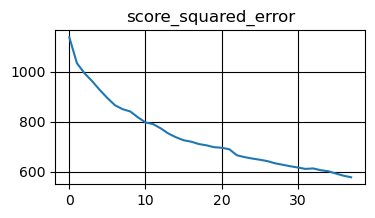

In [9]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category = UserWarning, message = "KMeans is known to have a memory leak on Windows with MKL")

arr_score = []

for i in range(2, 40):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
    score = kmeans.inertia_
    arr_score.append(score)

plt.figure(figsize = (4, 2))
plt.title('score_squared_error')
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

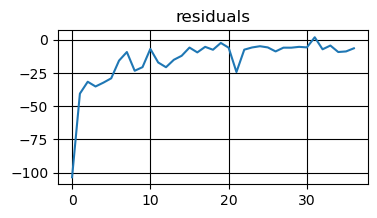

In [10]:
residual_arr = []

for i in range(len(arr_score) - 1):
    res = arr_score[i + 1] - arr_score[i]
    residual_arr.append(res)

plt.figure(figsize = (4, 2))
plt.title('residuals')
plt.plot(residual_arr, '-')
plt.grid(True, color = 'k')

In [11]:
# количество кластеров = 4

In [12]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
score = kmeans.inertia_
arr_score.append(score)

In [13]:
Counter(kmeans.labels_) # распределение окей

Counter({np.int32(3): 253,
         np.int32(1): 159,
         np.int32(2): 151,
         np.int32(0): 104})

In [14]:
claster_user_id = []

for i in range(10):
    temp = []
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            temp.append(j)
    claster_user_id.append(temp)

In [15]:
print('выбираем пользователя с id :', claster_user_id[0][0])
print('он относится к кластеру :', 0)
print('пользователи в кластере :', claster_user_id[0][0:20], '...')

выбираем пользователя с id : 2
он относится к кластеру : 0
пользователи в кластере : [2, 35, 41, 43, 57, 79, 80, 86, 96, 99, 102, 116, 121, 123, 131, 155, 184, 187, 195, 197] ...


In [16]:
#выберем фильм, который не смотрел пользователь с id 2
films_of_the_second_user = df3[df3['userId'] == 2]['id'].to_numpy()
print('id фильмов, которые посмотрел пользователь с id 2 :', np.sort(films_of_the_second_user))
films_of_the_other_user = df3[df3['userId'] == claster_user_id[0][2]]['id'].to_numpy()
print(f'id фильмов, которые посмотрел пользователь с id {claster_user_id[0][2]} :', np.sort(films_of_the_other_user))

id фильмов, которые посмотрел пользователь с id 2 : [ 62 144 150 153 161 165 168 185 186 223 235 248 253 261 266 272 292 296
 300 314 319 339 350 364 377 454 497 500 508 509 539 550 551 585 586 587
 588 590 592 616]
id фильмов, которые посмотрел пользователь с id 41 : [ 165  172  173  196  253  327  329  377  380  426  435  592  674  849
  924 1371 1372 1374 1375 1580 1690 1779 1880 1965 1997 2001 2105 2454
 2642 3033 3175 3638 4232 4553 6116]


In [17]:
#выберем фильм, с id 172
temp_score = np.mean(df3[(df3['id'] == 172) & (df3['userId'].isin(claster_user_id[0]))], axis = 0)['rating']
if temp_score < 4:
    result = 'не рекомендуется'
else:
    result = 'рекомендуется'
print('средняя оценка людей из кластера 0 для фильма с id 172 :', round(float(temp_score), 2), ', следовательно :', result)

средняя оценка людей из кластера 0 для фильма с id 172 : 2.93 , следовательно : не рекомендуется


In [18]:
# определим массив фильмов, которые смотрели хотя бы 5 пользователей из кластера 0
temp_arr = Counter(df3[df3['userId'].isin(claster_user_id[0])]['id']).most_common()

films_in_clast_0 = []
for i in range(len(temp_arr)):
    if temp_arr[i][1] >= 5:
        films_in_clast_0.extend([temp_arr[i][0]])
    else:
        break

In [42]:
# найдем наилучшие фильмы, которые можно рекомендовать пользователям в данном кластере

rating_films = []

for i in range(len(films_in_clast_0)):
    temp_score = np.mean(df3[(df3['id'] == films_in_clast_0[i]) & (df3['userId'].isin(claster_user_id[0]))], axis = 0)['rating']
    rating_films.append([films_in_clast_0[i], temp_score])

In [43]:
rating_films = np.array(rating_films)
rating_films = rating_films[rating_films[:, 1].argsort()[::-1]]

print('самые высокооцененные фильмы у пользователей из кластера № 0')

num = 10

count = Counter(df3[df3['userId'].isin(claster_user_id[0])]['id'])

for i in range(num):
    print('id :', int(rating_films[i][0]), '\tсредняя оценка : ', round(float(rating_films[i][1]), 2), '\tколичество голосов :', count[rating_films[i][0]], '\tназвание :', df1_red[df1_red['id'] == rating_films[i][0]]['original_title'].item())

самые высокооцененные фильмы у пользователей из кластера № 0
id : 926 	средняя оценка :  4.61 	количество голосов : 9 	название : Galaxy Quest
id : 913 	средняя оценка :  4.61 	количество голосов : 14 	название : The Thomas Crown Affair
id : 2019 	средняя оценка :  4.55 	количество голосов : 10 	название : Hard Target
id : 1272 	средняя оценка :  4.5 	количество голосов : 9 	название : Sunshine
id : 920 	средняя оценка :  4.5 	количество голосов : 11 	название : Cars
id : 858 	средняя оценка :  4.47 	количество голосов : 34 	название : Sleepless in Seattle
id : 903 	средняя оценка :  4.47 	количество голосов : 16 	название : Cool Hand Luke
id : 745 	средняя оценка :  4.44 	количество голосов : 8 	название : The Sixth Sense
id : 306 	средняя оценка :  4.44 	количество голосов : 8 	название : Beverly Hills Cop III
id : 1250 	средняя оценка :  4.42 	количество голосов : 12 	название : Ghost Rider
